In [30]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
# sklearn 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


## Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer, Normalizer
## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression, RidgeClassifier
#  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
#import cufflinks as cf
#cf.set_config_file(offline = True)

He intentado escoger acciones con poca correlación. La explicación de ellas es:

AAPL: Apple Inc., uno de los fabricantes más grandes de tecnología de consumo, conocido por productos como el iPhone, el iPad y las MacBooks.

RELIANCE.NS: Reliance Industries Limited, una conglomerado multinacional indio que tiene negocios en diversos sectores como energía, petroquímicos, textiles, recursos naturales, y telecomunicaciones. El sufijo ".NS" indica que la acción se negocia en la National Stock Exchange of India.

BHP.AX: BHP Group Limited (anteriormente BHP Billiton), una de las compañías mineras y de recursos más grandes del mundo. El sufijo ".AX" indica que la acción se negocia en la Australian Securities Exchange.

SAN.MC: Banco Santander, S.A., un banco multinacional español y una de las mayores instituciones bancarias de la zona euro. El sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

REP.MC: Repsol, S.A., una empresa energética y petroquímica española. Al igual que SAN.MC, el sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

IBE.MC: Iberdrola, S.A., una empresa española de energía, una de las mayores productoras de energía renovable. También cotiza en la Bolsa de Madrid.

TEF.MC: Telefónica, S.A., una compañía multinacional de telecomunicaciones con sede en España. También cotiza en la Bolsa de Madrid.

Acciones con las que trabajaré: 

["AAPL", "RELIANCE.NS", "BHP.AX", "SAN.MC", "REP.MC", "IBE.MC", "TEF.MC"]

In [2]:
df = pd.read_csv("acciones_preprocesado.csv")

# esto es una prueba, voy a quitar los 0 de la variable direccion pq si no, los modelos no lo interpretan bien..
df = df.loc[df['direction'] != 0].copy()

df.reset_index(inplace=True, drop=True)
df


,accion,date,high,low,price,returns,direction,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_s,ema_l,roll_low,roll_high
0,AAPL,2000-10-24,0.372768,0.335938,0.285350,-0.076468,-1.0,0.043894,0.029268,-0.060818,0.000000,-0.066091,0.786866,0.439835,1.133898,0.331946,0.444854,0.327009,0.437500
1,AAPL,2000-10-25,0.342634,0.329241,0.279680,-0.020069,-1.0,-0.076468,0.043894,0.029268,-0.060818,0.000000,0.784759,0.430590,1.138928,0.323905,0.432619,0.327009,0.415179
2,AAPL,2000-10-27,0.342634,0.319196,0.280625,0.003372,1.0,0.000000,-0.020069,-0.076468,0.043894,0.029268,0.780609,0.412876,1.148342,0.311489,0.410870,0.312500,0.415179
3,AAPL,2000-10-30,0.356027,0.334821,0.291963,0.039610,1.0,0.003372,0.000000,-0.020069,-0.076468,0.043894,0.778273,0.404112,1.152433,0.308485,0.402062,0.312500,0.415179
4,AAPL,2000-10-31,0.361607,0.343750,0.295743,0.012861,1.0,0.039610,0.003372,0.000000,-0.020069,-0.076468,0.775823,0.395493,1.156153,0.306525,0.394187,0.312500,0.415179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,TEF.MC,2024-02-22,3.792000,3.679000,3.743000,0.015888,1.0,0.004625,0.011244,0.018089,-0.015880,0.011956,3.636043,3.397125,3.874962,3.653032,3.668018,3.541000,3.792000
40796,TEF.MC,2024-02-23,3.776000,3.710000,3.776000,0.008778,1.0,0.015888,0.004625,0.011244,0.018089,-0.015880,3.636597,3.396894,3.876300,3.671950,3.676017,3.541000,3.792000
40797,TEF.MC,2024-02-27,3.815000,3.751000,3.810000,0.008964,1.0,0.000000,0.008778,0.015888,0.004625,0.011244,3.638124,3.396375,3.879873,3.706734,3.692799,3.541000,3.815000
40798,TEF.MC,2024-02-28,3.874000,3.814000,3.828000,0.004713,1.0,0.008964,0.000000,0.008778,0.015888,0.004625,3.639109,3.395876,3.882342,3.725390,3.702814,3.541000,3.874000


Lo primero que voy a hacer es transformar la fecha para poder meterla como variable numérica 

In [3]:
df.date = pd.to_datetime(df.date)

# Extraer componentes de la fecha
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # 0 es lunes, 6 es domingo
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week

# Aplicar codificación cíclica para mes y día de la semana
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
df['sin_day'] = np.sin(2 * np.pi * df['day']/31)
df['cos_day'] = np.cos(2 * np.pi * df['day']/31)
df['sin_day_of_week'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['cos_day_of_week'] = np.cos(2 * np.pi * df['day_of_week']/7)

# elimino la columna date porque ya la he procesado y la fecha como tal no se puede meter en el modelo
# elimino las otras variables que he transformado con seno y coseno para el tema de los ciclos naturales 
df.drop(["date", "month", "day", "day_of_week"], axis = 1, inplace = True)

df

,accion,high,low,price,returns,direction,lag1,lag2,lag3,lag4,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,AAPL,0.372768,0.335938,0.285350,-0.076468,-1.0,0.043894,0.029268,-0.060818,0.000000,...,0.437500,2000,298,43,-0.866025,0.5,-9.884683e-01,0.151428,0.781831,0.623490
1,AAPL,0.342634,0.329241,0.279680,-0.020069,-1.0,-0.076468,0.043894,0.029268,-0.060818,...,0.415179,2000,299,43,-0.866025,0.5,-9.377521e-01,0.347305,0.974928,-0.222521
2,AAPL,0.342634,0.319196,0.280625,0.003372,1.0,0.000000,-0.020069,-0.076468,0.043894,...,0.415179,2000,301,43,-0.866025,0.5,-7.247928e-01,0.688967,-0.433884,-0.900969
3,AAPL,0.356027,0.334821,0.291963,0.039610,1.0,0.003372,0.000000,-0.020069,-0.076468,...,0.415179,2000,304,44,-0.866025,0.5,-2.012985e-01,0.979530,0.000000,1.000000
4,AAPL,0.361607,0.343750,0.295743,0.012861,1.0,0.039610,0.003372,0.000000,-0.020069,...,0.415179,2000,305,44,-0.866025,0.5,-2.449294e-16,1.000000,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,TEF.MC,3.792000,3.679000,3.743000,0.015888,1.0,0.004625,0.011244,0.018089,-0.015880,...,3.792000,2024,53,8,0.866025,0.5,-9.680771e-01,-0.250653,0.433884,-0.900969
40796,TEF.MC,3.776000,3.710000,3.776000,0.008778,1.0,0.015888,0.004625,0.011244,0.018089,...,3.792000,2024,54,8,0.866025,0.5,-9.987165e-01,-0.050649,-0.433884,-0.900969
40797,TEF.MC,3.815000,3.751000,3.810000,0.008964,1.0,0.000000,0.008778,0.015888,0.004625,...,3.815000,2024,58,9,0.866025,0.5,-7.247928e-01,0.688967,0.781831,0.623490
40798,TEF.MC,3.874000,3.814000,3.828000,0.004713,1.0,0.008964,0.000000,0.008778,0.015888,...,3.874000,2024,59,9,0.866025,0.5,-5.712682e-01,0.820763,0.974928,-0.222521


Ahora voy a separar los data frames en:
1.- variables categóricas para hacerle onehotencoding
2.- variables numéricas para aplicarle escaladores
3.- variables seno y cosenoidales que no se transforman ya más
4.- variable objetivo (dirección)

In [4]:
df_cat = df[["accion"]].copy()
columns_to_exclude = ["accion", "direction"]
columns_to_select = [col for col in df.columns if col not in columns_to_exclude]
df_num = df[columns_to_select].copy()
df_dir = df[["direction"]].copy()

Empiezo haciendo one hot encoding sobre la única variable tipo texto que tengo. El nombre de la acción

In [6]:
df_num.describe()

,high,low,price,returns,lag1,lag2,lag3,lag4,lag5,sma200,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
count,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,40800.000000,...,40800.000000,40800.000000,40800.000000,40800.0,4.080000e+04,4.080000e+04,4.080000e+04,40800.000000,40800.000000,40800.000000
mean,115.835923,113.166296,106.532504,0.000401,0.000383,0.000388,0.000370,0.000377,0.000403,99.780741,...,119.797313,2012.054363,183.286936,26.612525,-1.208880e-02,2.213266e-03,4.586593e-03,-0.026308,0.357589,-0.083000
std,368.239792,360.422123,360.980872,0.020575,0.020429,0.020457,0.020438,0.020414,0.020451,338.253216,...,379.261289,6.732757,105.354301,15.048324,7.059626e-01,7.081598e-01,7.139224e-01,0.699733,0.513340,0.775722
min,0.235536,0.227143,0.198346,-0.776290,-0.776290,-0.776290,-0.776290,-0.776290,-0.776290,0.222776,...,0.257857,2000.000000,1.000000,1.0,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-0.974928,-0.900969
25%,6.582000,6.451000,3.578982,-0.009340,-0.009137,-0.009124,-0.009137,-0.009110,-0.009097,3.498269,...,6.780000,2006.000000,91.000000,13.0,-8.660254e-01,-8.660254e-01,-7.247928e-01,-0.758758,0.000000,-0.900969
50%,13.129587,12.850000,6.505462,0.000701,0.000374,0.000357,0.000307,0.000384,0.000368,6.493264,...,13.550000,2012.000000,184.000000,27.0,-2.449294e-16,6.123234e-17,-2.449294e-16,-0.050649,0.433884,-0.222521
75%,29.983500,29.561537,16.285684,0.010262,0.010043,0.010034,0.010047,0.010043,0.010060,15.498839,...,30.979361,2018.000000,275.000000,40.0,5.000000e-01,8.660254e-01,7.247928e-01,0.688967,0.781831,0.623490
max,2999.899902,2966.699951,2987.250000,0.782708,0.782708,0.782708,0.782708,0.782708,0.782708,2486.273513,...,2999.899902,2024.000000,366.000000,53.0,1.000000e+00,1.000000e+00,9.987165e-01,1.000000,0.974928,1.000000


In [7]:
df_cat = pd.get_dummies(df_cat, columns=["accion"]).astype(int)
df_cat 

,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
40795,0,0,0,0,0,0,1
40796,0,0,0,0,0,0,1
40797,0,0,0,0,0,0,1
40798,0,0,0,0,0,0,1


Ahora aplico escaladores sobre las variables numéricas

In [8]:
df_num

,high,low,price,returns,lag1,lag2,lag3,lag4,lag5,sma200,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,0.372768,0.335938,0.285350,-0.076468,0.043894,0.029268,-0.060818,0.000000,-0.066091,0.786866,...,0.437500,2000,298,43,-0.866025,0.5,-9.884683e-01,0.151428,0.781831,0.623490
1,0.342634,0.329241,0.279680,-0.020069,-0.076468,0.043894,0.029268,-0.060818,0.000000,0.784759,...,0.415179,2000,299,43,-0.866025,0.5,-9.377521e-01,0.347305,0.974928,-0.222521
2,0.342634,0.319196,0.280625,0.003372,0.000000,-0.020069,-0.076468,0.043894,0.029268,0.780609,...,0.415179,2000,301,43,-0.866025,0.5,-7.247928e-01,0.688967,-0.433884,-0.900969
3,0.356027,0.334821,0.291963,0.039610,0.003372,0.000000,-0.020069,-0.076468,0.043894,0.778273,...,0.415179,2000,304,44,-0.866025,0.5,-2.012985e-01,0.979530,0.000000,1.000000
4,0.361607,0.343750,0.295743,0.012861,0.039610,0.003372,0.000000,-0.020069,-0.076468,0.775823,...,0.415179,2000,305,44,-0.866025,0.5,-2.449294e-16,1.000000,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,3.792000,3.679000,3.743000,0.015888,0.004625,0.011244,0.018089,-0.015880,0.011956,3.636043,...,3.792000,2024,53,8,0.866025,0.5,-9.680771e-01,-0.250653,0.433884,-0.900969
40796,3.776000,3.710000,3.776000,0.008778,0.015888,0.004625,0.011244,0.018089,-0.015880,3.636597,...,3.792000,2024,54,8,0.866025,0.5,-9.987165e-01,-0.050649,-0.433884,-0.900969
40797,3.815000,3.751000,3.810000,0.008964,0.000000,0.008778,0.015888,0.004625,0.011244,3.638124,...,3.815000,2024,58,9,0.866025,0.5,-7.247928e-01,0.688967,0.781831,0.623490
40798,3.874000,3.814000,3.828000,0.004713,0.008964,0.000000,0.008778,0.015888,0.004625,3.639109,...,3.874000,2024,59,9,0.866025,0.5,-5.712682e-01,0.820763,0.974928,-0.222521


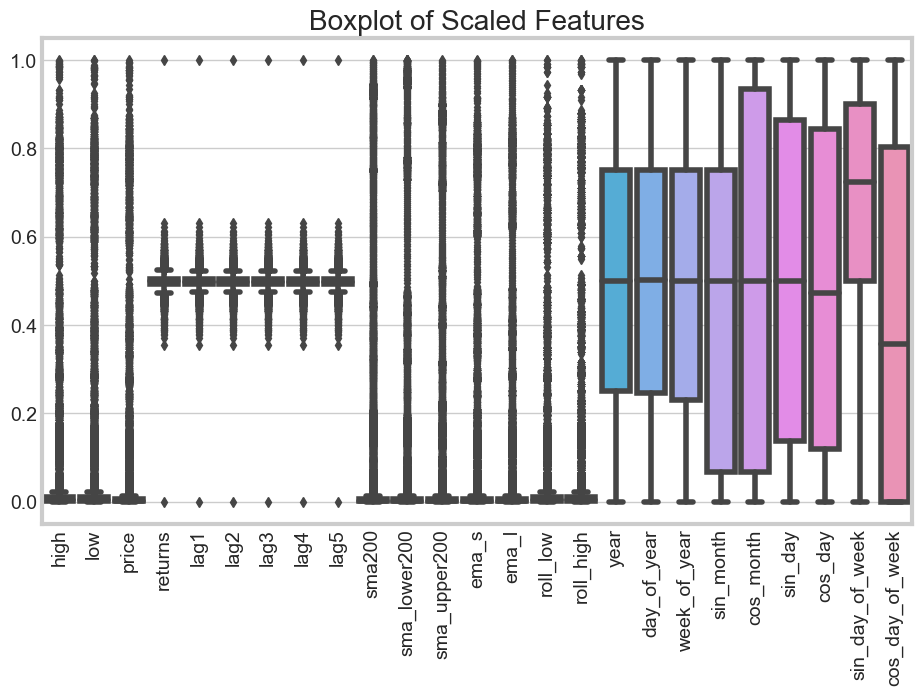

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_num)

# Convertir de nuevo a DataFrame si es necesario, manteniendo los mismos nombres de columnas
df_num = pd.DataFrame(scaled_data, columns=df_num.columns)
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico a tu preferencia

# Boxplot de todos los datos escalados
sns.boxplot(data=df_num)

# Dar título al gráfico
plt.title('Boxplot of Scaled Features')

# Mejorar los ticks del eje x para evitar la superposición
plt.xticks(rotation=90)

plt.show()


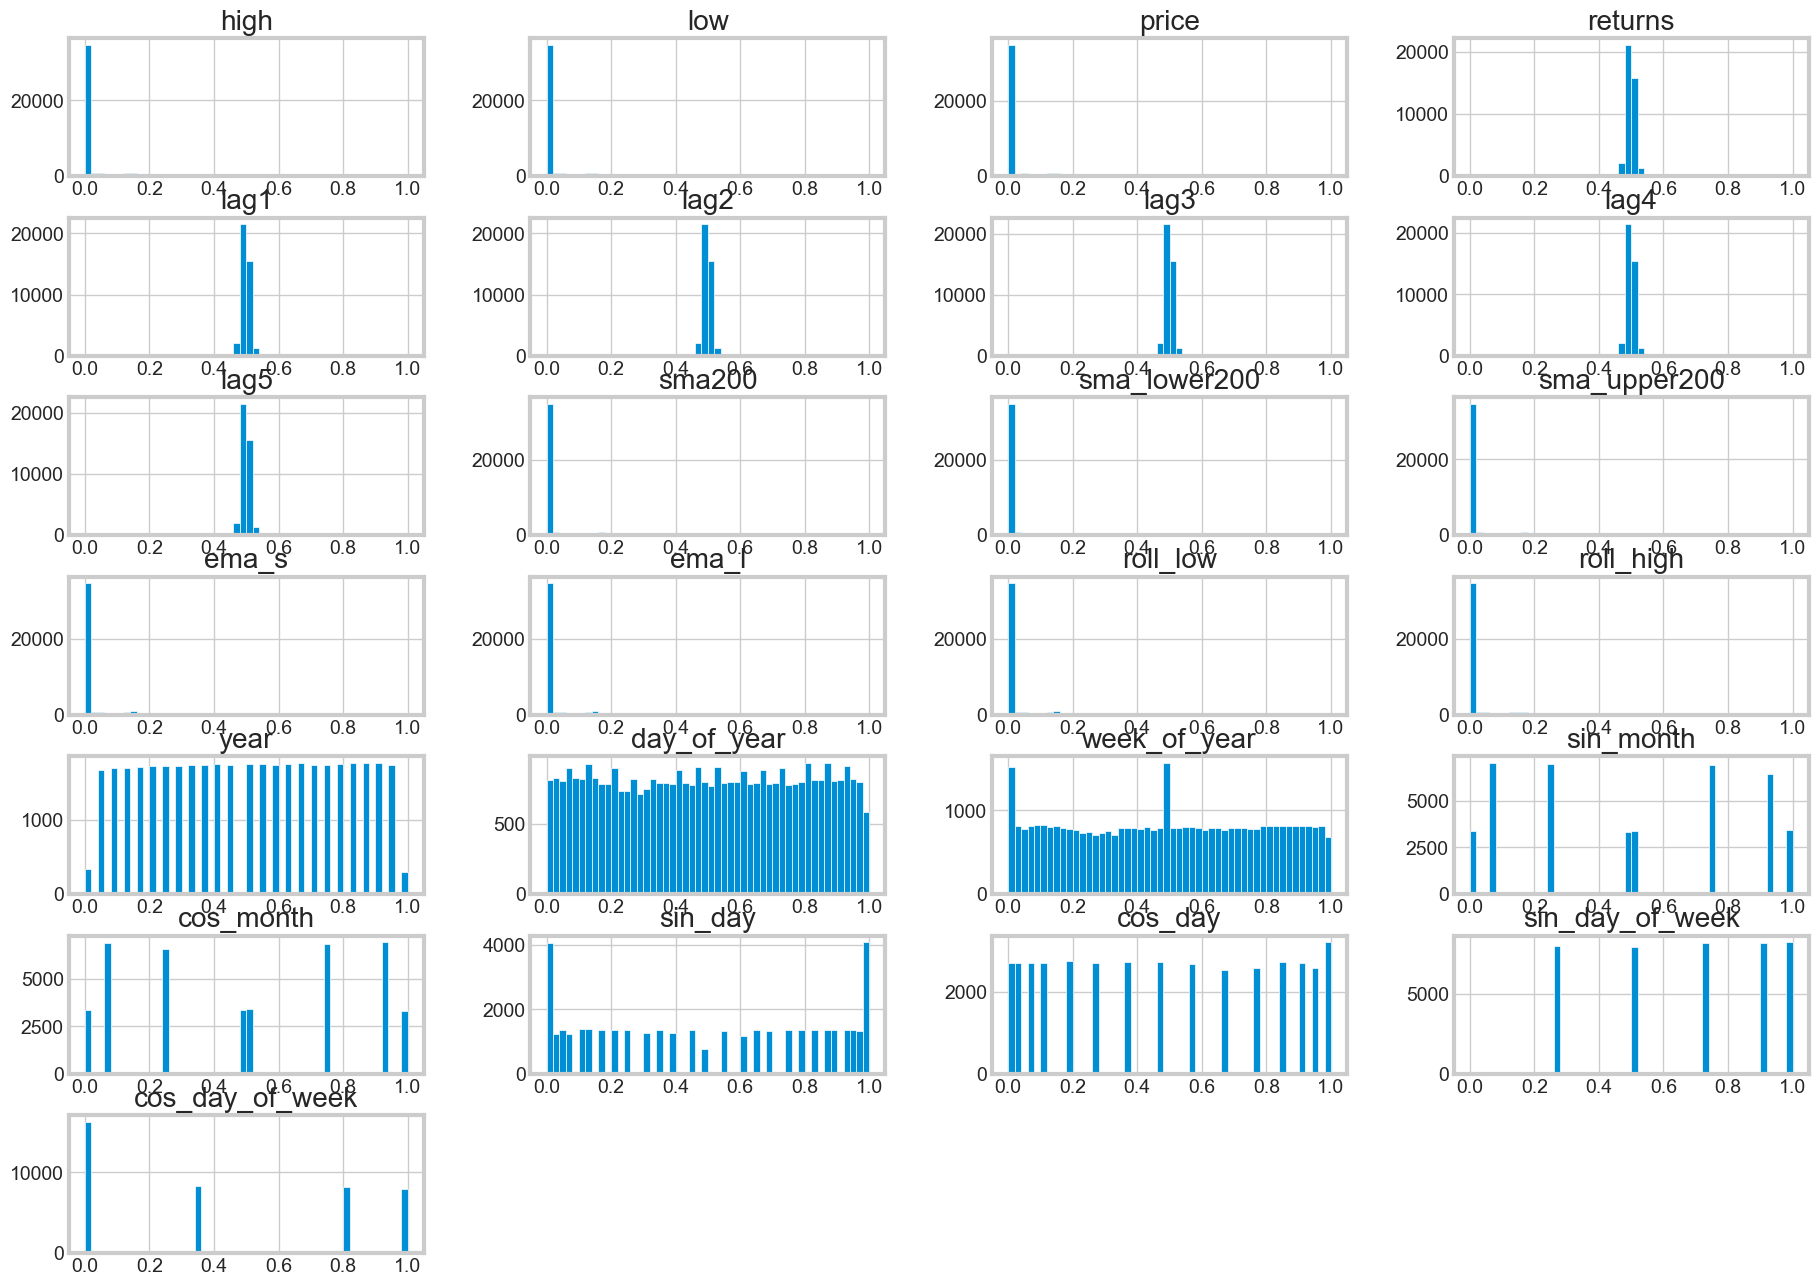

In [12]:
# Histogramas de todos los datos escalados
df_num.hist(figsize=(20, 15), bins=50, layout=(7, 4))
plt.show()
# Me parece rara la distribucion de price, low y high...

Ahora ya tengo el df de categóricas con onehotencoding y las numéricas con los datos escalados. Por tanto los quiero volver a unir y juntar también con las variables seno y cosenoidales. Y tener solo separada la variable objetivo

In [15]:
df = pd.concat([df_cat, df_num], axis=1)
df

,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC,high,low,price,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,1,0,0,0,0,0,0,0.000046,0.000037,0.000029,...,0.000060,0.0,0.813699,0.807692,0.066987,0.75,0.005131,0.574623,0.900969,8.019377e-01
1,1,0,0,0,0,0,0,0.000036,0.000034,0.000027,...,0.000052,0.0,0.816438,0.807692,0.066987,0.75,0.030521,0.672813,1.000000,3.568959e-01
2,1,0,0,0,0,0,0,0.000036,0.000031,0.000028,...,0.000052,0.0,0.821918,0.807692,0.066987,0.75,0.137138,0.844083,0.277479,0.000000e+00
3,1,0,0,0,0,0,0,0.000040,0.000036,0.000031,...,0.000052,0.0,0.830137,0.826923,0.066987,0.75,0.399221,0.989739,0.500000,1.000000e+00
4,1,0,0,0,0,0,0,0.000042,0.000039,0.000033,...,0.000052,0.0,0.832877,0.826923,0.066987,0.75,0.500000,1.000000,0.900969,8.019377e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,0,0,0,0,0,0,1,0.001186,0.001164,0.001187,...,0.001178,1.0,0.142466,0.134615,0.933013,0.75,0.015339,0.373065,0.722521,5.551115e-17
40796,0,0,0,0,0,0,1,0.001180,0.001174,0.001198,...,0.001178,1.0,0.145205,0.134615,0.933013,0.75,0.000000,0.473324,0.277479,0.000000e+00
40797,0,0,0,0,0,0,1,0.001193,0.001188,0.001209,...,0.001186,1.0,0.156164,0.153846,0.933013,0.75,0.137138,0.844083,0.900969,8.019377e-01
40798,0,0,0,0,0,0,1,0.001213,0.001209,0.001215,...,0.001206,1.0,0.158904,0.153846,0.933013,0.75,0.213999,0.910151,1.000000,3.568959e-01


In [16]:
# por otra parte me guardo la variable objetivo en este dataframe y veo que está balanceado pero que tiene algunos 0, 
# no se bien que hacer con ellos. Significa que la diferencia de precio de un día a otro ha sido 0
df_dir.direction.value_counts()

direction
 1.0    21028
-1.0    19772
Name: count, dtype: int64

Ahora vamos a entrenar un modelo solo para ver que tal funciona, si me das el ok Alejandro intento meterle un bucle para que pruebe distintos modelos y distintos escaladores. De momento hago la prueba con logistic regression.

In [17]:
df

,accion_AAPL,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC,high,low,price,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,1,0,0,0,0,0,0,0.000046,0.000037,0.000029,...,0.000060,0.0,0.813699,0.807692,0.066987,0.75,0.005131,0.574623,0.900969,8.019377e-01
1,1,0,0,0,0,0,0,0.000036,0.000034,0.000027,...,0.000052,0.0,0.816438,0.807692,0.066987,0.75,0.030521,0.672813,1.000000,3.568959e-01
2,1,0,0,0,0,0,0,0.000036,0.000031,0.000028,...,0.000052,0.0,0.821918,0.807692,0.066987,0.75,0.137138,0.844083,0.277479,0.000000e+00
3,1,0,0,0,0,0,0,0.000040,0.000036,0.000031,...,0.000052,0.0,0.830137,0.826923,0.066987,0.75,0.399221,0.989739,0.500000,1.000000e+00
4,1,0,0,0,0,0,0,0.000042,0.000039,0.000033,...,0.000052,0.0,0.832877,0.826923,0.066987,0.75,0.500000,1.000000,0.900969,8.019377e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,0,0,0,0,0,0,1,0.001186,0.001164,0.001187,...,0.001178,1.0,0.142466,0.134615,0.933013,0.75,0.015339,0.373065,0.722521,5.551115e-17
40796,0,0,0,0,0,0,1,0.001180,0.001174,0.001198,...,0.001178,1.0,0.145205,0.134615,0.933013,0.75,0.000000,0.473324,0.277479,0.000000e+00
40797,0,0,0,0,0,0,1,0.001193,0.001188,0.001209,...,0.001186,1.0,0.156164,0.153846,0.933013,0.75,0.137138,0.844083,0.900969,8.019377e-01
40798,0,0,0,0,0,0,1,0.001213,0.001209,0.001215,...,0.001206,1.0,0.158904,0.153846,0.933013,0.75,0.213999,0.910151,1.000000,3.568959e-01


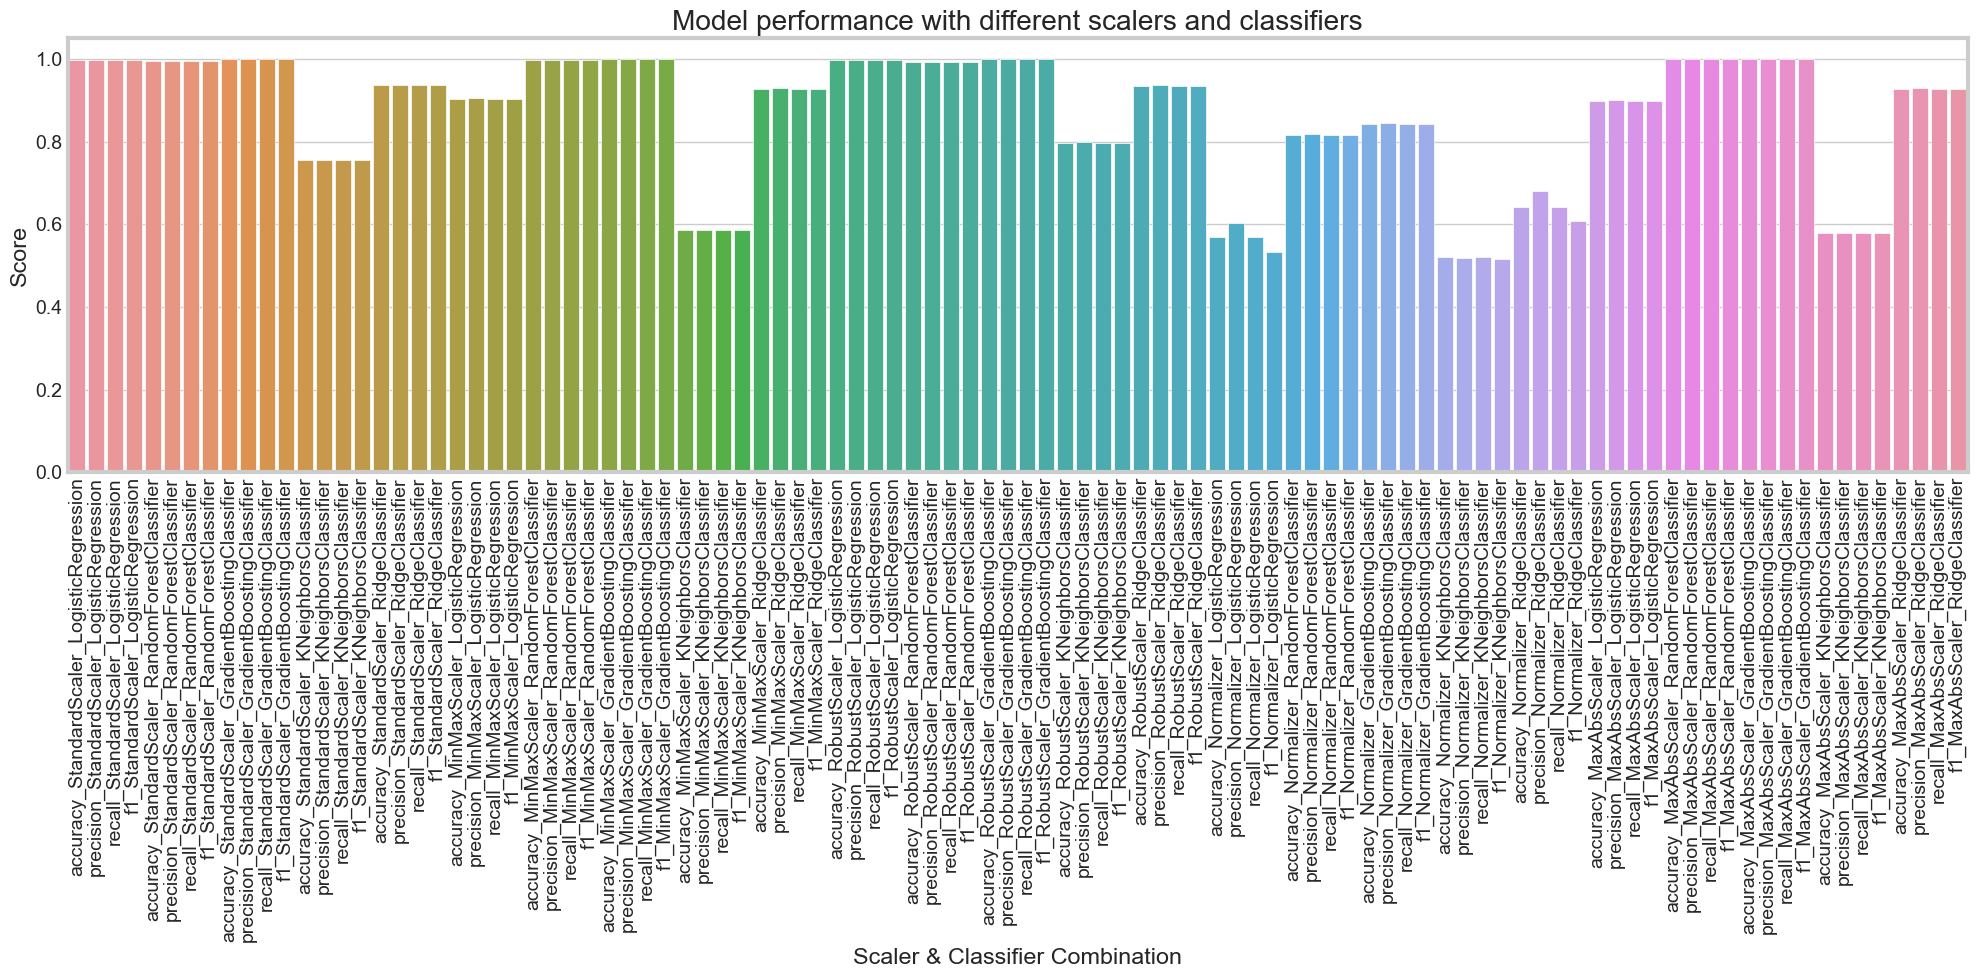

In [28]:
# Definir escaladores y modelos
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer(),
    'MaxAbsScaler': MaxAbsScaler()
}

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RidgeClassifier': RidgeClassifier()
}

# Estratificación para cross-validation
cv = StratifiedKFold(n_splits=5)

# Almacenar resultados en una lista para análisis posterior
results_list = []

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        # Crear un pipeline con el escalador y el modelo actual
        pipeline = Pipeline([
            (scaler_name, scaler),
            (model_name, model)
        ])
        
        # Concatenar df_num escalado con df_cat
        df = pd.concat([df_num, df_cat], axis=1)
        
        # Realizar cross-validation
        scores = cross_validate(pipeline, df, df_dir, cv=cv, 
                                scoring={
                                    'accuracy': make_scorer(accuracy_score), 
                                    'precision': make_scorer(precision_score, average='weighted'), 
                                    'recall': make_scorer(recall_score, average='weighted'), 
                                    'f1': make_scorer(f1_score, average='weighted')
                                }, return_train_score=False)
        
        # Calcular las métricas promedio y almacenar los resultados
        mean_scores = pd.DataFrame({f"{metric}_{scaler_name}_{model_name}": [scores[f'test_{metric}'].mean()] 
                                    for metric in ['accuracy', 'precision', 'recall', 'f1']})
        results_list.append(mean_scores)

# Concatenar todos los DataFrames de la lista en uno solo
results_df = pd.concat(results_list, ignore_index=True)

# Ajuste para poder usar seaborn
long_df = pd.melt(results_df, var_name='combination', value_name='score')

# Crear una figura grande para tener suficiente espacio
plt.figure(figsize=(20, 10))

# Hacer un gráfico de barras con los datos de rendimiento
sns.barplot(x='combination', y='score', data=long_df)
plt.xticks(rotation=90)  # Rota las etiquetas para que sean legibles
plt.title('Model performance with different scalers and classifiers')
plt.ylabel('Score')
plt.xlabel('Scaler & Classifier Combination')

# Mostrar la figura
plt.tight_layout()  # Ajustar la disposición
plt.show()

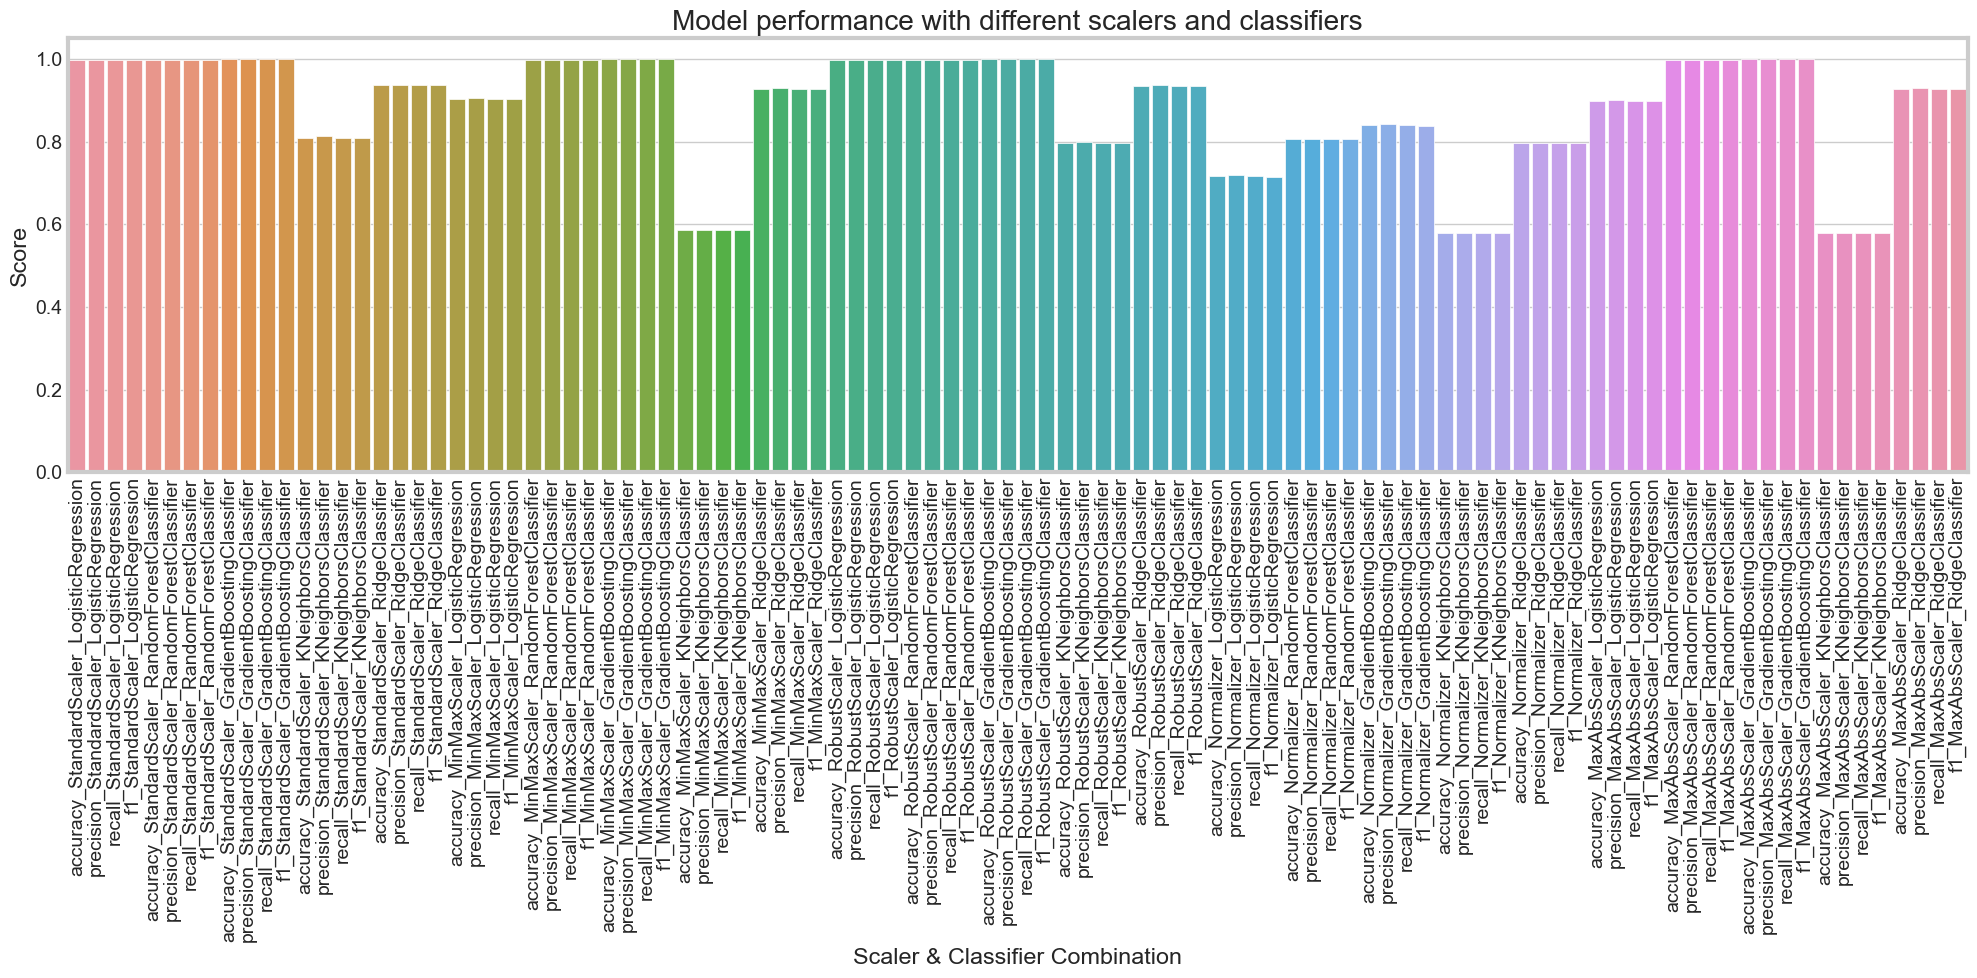

In [31]:

# Definir escaladores y modelos
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer(),
    'MaxAbsScaler': MaxAbsScaler()
}

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RidgeClassifier': RidgeClassifier()
}

# Estratificación para cross-validation
cv = StratifiedKFold(n_splits=5)

# Concatenar df_num escalado con df_cat
df = pd.concat([df_num, df_cat], axis=1)

# Columnas numéricas y categóricas
num_cols = df_num.columns.tolist()
cat_cols = df_cat.columns.tolist()

# Almacenar resultados en una lista para análisis posterior
results_list = []

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        # Preprocesamiento para aplicar el escalador solo a las columnas numéricas
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', scaler, num_cols),
                ('cat', 'passthrough', cat_cols)
            ])

        # Crear un pipeline con el preprocesador y el modelo actual
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            (model_name, model)
        ])
        
        # Realizar cross-validation
        scores = cross_validate(pipeline, df, df_dir, cv=cv, 
                                scoring={
                                    'accuracy': make_scorer(accuracy_score), 
                                    'precision': make_scorer(precision_score, average='weighted'), 
                                    'recall': make_scorer(recall_score, average='weighted'), 
                                    'f1': make_scorer(f1_score, average='weighted')
                                }, return_train_score=False)
        
        # Calcular las métricas promedio y almacenar los resultados
        mean_scores = pd.DataFrame({f"{metric}_{scaler_name}_{model_name}": [scores[f'test_{metric}'].mean()] 
                                    for metric in ['accuracy', 'precision', 'recall', 'f1']})
        results_list.append(mean_scores)

# Concatenar todos los DataFrames de la lista en uno solo
results_df = pd.concat(results_list, ignore_index=True)

# Ajuste para poder usar seaborn
long_df = pd.melt(results_df, var_name='combination', value_name='score')

# Crear una figura grande para tener suficiente espacio
plt.figure(figsize=(20, 10))

# Hacer un gráfico de barras con los datos de rendimiento
sns.barplot(x='combination', y='score', data=long_df)
plt.xticks(rotation=90)  # Rota las etiquetas para que sean legibles
plt.title('Model performance with different scalers and classifiers')
plt.ylabel('Score')
plt.xlabel('Scaler & Classifier Combination')

# Mostrar la figura
plt.tight_layout()  # Ajustar la disposición
plt.show()
